### In this notebook, you will get the answers of the following questions:
   ####  What attributes does this dataset has. take trainning set as an exmaple.
   #### How many files do train and test dataset have?
   #### The distribution of each categories in the training dataset
   #### Creating a term frequency matrix
   #### Comparing texts
   #### Comparing text - cosine similarity

In [4]:
# import dataset
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

In [5]:

# training and test
news_train = fetch_20newsgroups(subset='train')
news_test = fetch_20newsgroups(subset='test')


#### Next, we will see what attributes does this dataset has. take trainning set as an exmaple.

In [9]:
# data
print news_train.data[0]

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [10]:
# filenames
print news_train.filenames[0]

/Users/zjm/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994


In [14]:
# target
print news_train.target[:10]

[ 7  4  4  1 14 16 13  3  2  4]


In [22]:
# target_names
print news_train.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### How many files do train and test dataset have?

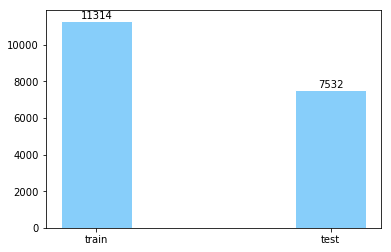

In [18]:
import numpy as np
from matplotlib import pyplot as plt

lables = ['train','test'] 
Y = [len(news_train.data),len(news_test.data)]
X = np.arange(len(lables))
plt.bar(X,Y,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white')  
plt.xticks(X, labels)# stick labels on x axis
for x,y in zip(X,Y):
    plt.text(x,y+0.005,y, ha='center', va= 'bottom',fontsize=10)
plt.show()

#### The distribution of each categories in the training dataset

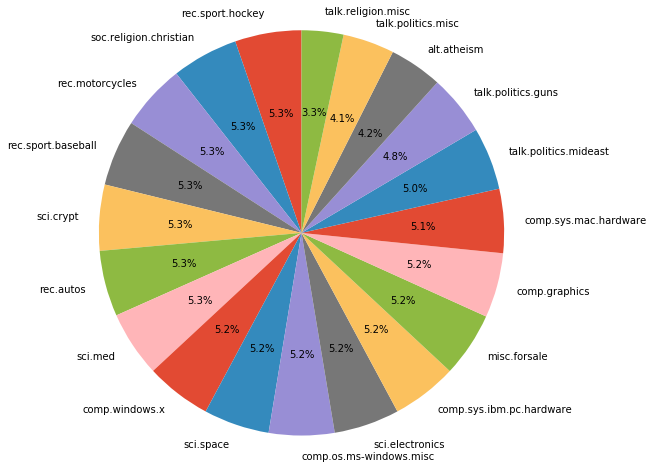

"\n    # Then we will plot it out\nlables_cat = category\nY_cat = count\nX_cat = np.arange(len(lables_cat))\n\nplt.bar(X_cat,Y_cat,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white')  \nplt.xticks(X_cat, lables_cat)# stick labels on x axis\nfor x,y in zip(X_cat,Y_cat):\n    plt.text(x,y+0.005,y, ha='center', va= 'bottom',fontsize=7)\nplt.show()\n"

In [61]:

category = news.target_names
# bacause that 'categories' parameter in fetch_20newsgroups only accepts list, 
# so we have to split the category list into several sublists containing one category in each sublist
size = 1
splited_cat = [category[i:i+size] for i  in range(0, len(category), size)]

count = []
for cat in splited_cat: 
    countofcat = fetch_20newsgroups(subset='train', categories=cat) 
    count.append([cat[0], len(countofcat.filenames)])
    #print cat[0] + str(countofcat.filenames.shape)

# sort the count list by the count number
count_sorted = sorted(count, key=lambda x: x[1], reverse=True)

# plot a pir chart of the category distribution
# import this style to make the color scheme looks better
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# set figure size
fig = plt.figure(figsize=[8, 8])
labels, sizes = zip(* count_sorted)

plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()


- So we can see the categories are almost distributed equally in the training dataset.

#### Creating a term frequency matrix
Treating texts as a list of word frequencies (a vector) also makes available a vast range of mathematical tools developed for studying and manipulating vectors.

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

Now we use the CountVectorizer class to create a document-term matrix. CountVectorizer is customizable. For example, a list of “stop words” can be specified with the stop_words parameter. Other important parameters include:

- lowercase (default True) convert all text to lowercase before tokenizing
- min_df (default 1) remove terms from the vocabulary that occur in fewer than min_df documents (in a large corpus this may be set to 15 or higher to eliminate very rare words)
- vocabulary ignore words that do not appear in the provided list of words
strip_accents remove accents
- token_pattern (default u'(?u)\b\w\w+\b') regular expression identifying tokens–by default words that consist of a single character (e.g., ‘a’, ‘2’) are ignored, setting token_pattern to '(?u)\b\w+\b' will include these tokens
- tokenizer (default unused) use a custom function for tokenizing

In [7]:
# here we use 10 news article in the trainning dataset as examples.
news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
texts = news.data[:10]



In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts) # a sparse matrix 稀疏矩阵
feature_names = vectorizer.get_feature_names() # a list

X = X.toarray() # convert to a regular array
feature_names = np.array(feature_names)
print X
print feature_names

[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 1 1]
 [0 1 0 ..., 0 1 0]
 ..., 
 [4 1 1 ..., 0 2 1]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[u'10mb' u'120' u'12mb' u'15' u'16' u'160' u'161' u'173' u'180' u'185c'
 u'1985' u'20' u'20mb' u'213' u'32' u'36' u'40mb' u'44' u'512k' u'5mb'
 u'60s' u'6mb' u'70s' u'800' u'80mb' u'96' u'about' u'above' u'access'
 u'accidentally' u'active' u'actually' u'adapters' u'add' u'addition'
 u'address' u'advance' u'after' u'aim' u'all' u'allegedly' u'allowed'
 u'although' u'an' u'analysis' u'and' u'another' u'answer' u'answered'
 u'ansynchronous' u'any' u'anybody' u'anymore' u'anyone' u'appearence'
 u'apple' u'appreciated' u'are' u'aren' u'argument' u'around' u'article'
 u'as' u'astrocytomas' u'at' u'attained' u'autodoubler' u'available'
 u'back' u'baker' u'base' u'basically' u'be' u'because' u'been' u'before'
 u'being' u'better' u'bill' u'bit' u'bmp' u'board' u'body' u'both'
 u'bouncing' u'brando' u'brave' u'breifly' u'bricklin' u'brief' u'bugs'
 u'bumper' u'bunch' u

##### Note: 
A sparse matrix only records non-zero entries and is used to store matrices that contain a significant number of entries that are zero. To understand why this matters enough that CountVectorizer returns a sparse matrix by default, consider a 4000 by 50000 matrix of word frequencies that is 60% zeros. In Python an integer takes up four bytes, so using a sparse matrix saves almost 500M of memory

With this preparatory work behind us, querying the term frequency matrix is simple. For example, the following demonstrate two ways finding how many times the word ‘is’ occurs in the first text:

In [9]:
# list(feature_names) or vocab.tolist() will take feature_names (an array) and return a list
is_idx = list(feature_names).index('is')
X[0,is_idx] # '0' means the first text in the corpus

2

#### Comparing texts
Since each row of the term frequency matrix is a sequence of a novel’s word frequencies, it is possible to put mathematical notions of similarity (or distance) between sequences of numbers in service of calculating the similarity (or distnace) between any two novels. One frequently used measure of distance between vectors (a measure easily converted into a measure of similarity) is Euclidean distance. The Euclidean distance between two vectors in the plane should be familiar from geometry, as it is the length of the hypotenuse that joins the two vectors. 

Since two novels in our corpus now have an expression as vectors, we can calculate the Euclidean distance between them. We can do this by hand or we can avail ourselves of the scikit-learn function euclidean_distances.

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(X)
np.round(dist,1) # np.round(X, 1) Round an array to the given number of decimals.表示保留小数点后1位

array([[  0. ,  13.9,  26.2,  12.9,  14. ,  13. ,  13.7,  37.1,  12.8,
         20.5],
       [ 13.9,   0. ,  27.7,  11.2,  13.2,  12.9,  12.4,  37.4,  11.1,
         20.8],
       [ 26.2,  27.7,   0. ,  30.7,  27.5,  27.4,  30.2,  40.1,  29.1,
         24.7],
       [ 12.9,  11.2,  30.7,   0. ,  11.3,  11. ,   8.5,  37.9,   6.7,
         22.3],
       [ 14. ,  13.2,  27.5,  11.3,   0. ,  12.7,  13.1,  37.2,  11. ,
         20.5],
       [ 13. ,  12.9,  27.4,  11. ,  12.7,   0. ,  12.2,  37. ,  10.8,
         20.5],
       [ 13.7,  12.4,  30.2,   8.5,  13.1,  12.2,   0. ,  38.4,   9.5,
         22.7],
       [ 37.1,  37.4,  40.1,  37.9,  37.2,  37. ,  38.4,   0. ,  37.8,
         38.6],
       [ 12.8,  11.1,  29.1,   6.7,  11. ,  10.8,   9.5,  37.8,   0. ,  21. ],
       [ 20.5,  20.8,  24.7,  22.3,  20.5,  20.5,  22.7,  38.6,  21. ,   0. ]])

In [20]:
# distance between the 1st and 2nd text is:
dist[0,1]

13.856406460551018

In [21]:
# distance between the 1st and 3rd text is:
dist[1,2]

27.748873851023216

In [13]:
dist[0,2]

26.153393661244042

####  Comparing text - cosine similarity （余弦相似性）
Keep in mind that cosine similarity is a measure of similarity (rather than distance) that ranges between 0 and 1 (as it is the cosine of the angle between the two vectors). In order to get a measure of distance (or dissimilarity), we need to “flip” the measure so that a larger angle receives a larger value. The distance measure derived from cosine similarity is therefore one minus the cosine similarity between two vectors.
![title](img/1.png)
![title](img/2.png)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
dist_cos =  cosine_similarity(X)
np.round(dist_cos,2)

array([[ 1.  ,  0.34,  0.56,  0.14,  0.3 ,  0.42,  0.19,  0.26,  0.24,
         0.43],
       [ 0.34,  1.  ,  0.46,  0.16,  0.28,  0.33,  0.19,  0.22,  0.28,
         0.38],
       [ 0.56,  0.46,  1.  ,  0.14,  0.48,  0.49,  0.23,  0.34,  0.41,
         0.62],
       [ 0.14,  0.16,  0.14,  1.  ,  0.05,  0.19,  0.1 ,  0.14,  0.09,
         0.08],
       [ 0.3 ,  0.28,  0.48,  0.05,  1.  ,  0.32,  0.05,  0.23,  0.24,  0.4 ],
       [ 0.42,  0.33,  0.49,  0.19,  0.32,  1.  ,  0.2 ,  0.26,  0.3 ,  0.4 ],
       [ 0.19,  0.19,  0.23,  0.1 ,  0.05,  0.2 ,  1.  ,  0.09,  0.09,
         0.13],
       [ 0.26,  0.22,  0.34,  0.14,  0.23,  0.26,  0.09,  1.  ,  0.15,
         0.27],
       [ 0.24,  0.28,  0.41,  0.09,  0.24,  0.3 ,  0.09,  0.15,  1.  ,
         0.35],
       [ 0.43,  0.38,  0.62,  0.08,  0.4 ,  0.4 ,  0.13,  0.27,  0.35,  1.  ]])

* In this array, we can see the cosine_simimarity value of pairs of texts. For example, the value of text[0] and text[1] is 0.34, shown at the 1st row & 2nd column and the 2nd row & 1st column. This is a Symmetric matrix （对称矩阵）as the values of distance between text1&text2 and text2&text1 are equal.

In [26]:
dist_cos[0,1]

0.34119220567316777

In [27]:
dist_cos[0,2]

0.55692646864330542

In [28]:
dist_cos[1,2]

0.45827796323714393

### Visualizing distance
It is often desirable to visualize the pairwise distances between our texts. A general approach to visualizing distances is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, “multidimensional scaling” (MDS) and family of functions in scikit-learn

In [38]:
import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 2 components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
# 将距离矩阵转化为一个二维数组
pos = mds.fit_transform(dist_cos)  # shape (n_components, n_samples)
print pos

[[ 0.02441646  0.24374339]
 [-0.13776129 -0.12042414]
 [ 0.34146885 -0.07236293]
 [-0.01109348  0.03813358]
 [-0.04896096  0.09023261]
 [-0.01135042 -0.24072232]
 [-0.0067358   0.00679288]
 [ 0.0339696  -0.05543303]
 [ 0.08084685  0.0458428 ]
 [-0.2647998   0.06419716]]


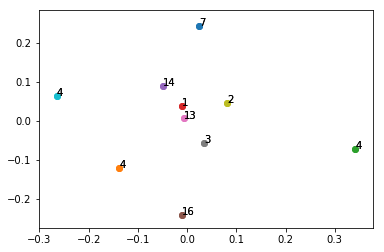

In [42]:
xs, ys = pos[:, 0], pos[:, 1]

# here I use index of categories as the labels in the plot
labels = news.target[:10]

for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

We can also do MDS in three dimensions:

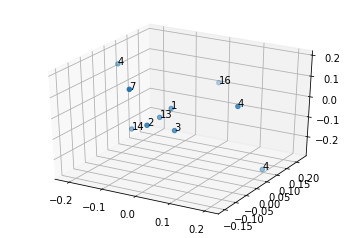

In [43]:
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist_cos)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], labels):
    ax.text(x, y, z, s)
plt.show()

From the figure, we can see that 
- target 1, 2, 3, 13, 14 are close to each other. 
- three text belonging to target 4 are farway to each other

So let's see what categories those target numbers represent:

In [45]:
target_names = news.target_names
for idx, val in enumerate(target_names):
    print(idx, val)

(0, 'alt.atheism')
(1, 'comp.graphics')
(2, 'comp.os.ms-windows.misc')
(3, 'comp.sys.ibm.pc.hardware')
(4, 'comp.sys.mac.hardware')
(5, 'comp.windows.x')
(6, 'misc.forsale')
(7, 'rec.autos')
(8, 'rec.motorcycles')
(9, 'rec.sport.baseball')
(10, 'rec.sport.hockey')
(11, 'sci.crypt')
(12, 'sci.electronics')
(13, 'sci.med')
(14, 'sci.space')
(15, 'soc.religion.christian')
(16, 'talk.politics.guns')
(17, 'talk.politics.mideast')
(18, 'talk.politics.misc')
(19, 'talk.religion.misc')


(1, 'comp.graphics')

(2, 'comp.os.ms-windows.misc')

(3, 'comp.sys.ibm.pc.hardware')

(13, 'sci.med')

(14, 'sci.space')

(4, 'comp.sys.mac.hardware')